In [38]:
import pandas as pd
import plotly.express as px
import os
from  datetime import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio

import common_libs.data_loader as load_data
#pip install -U kaleido
#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [39]:
is_py=False

In [40]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 

# Filter=1; 


# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 



In [41]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\PythonDev\MyQuantFinProject\Data'
result_path='D:\PythonDev\MyQuantFinProject\Data\Report'

mode='offline'
print(mode)

offline


In [42]:
if mode=='offline':
    file_name='THAI-ASIA-EEM_Y22-Now.csv'
    title=file_name.replace('.csv','')
    data_file=os.path.join(root_path,file_name)
    print(data_file,' -',file_name," : ",title)

else:
    list_symbol=['AAXJ','3010.HK','EEM']
    title='3AsianETF'
    print(list_symbol," : ",title)


D:\PythonDev\MyQuantFinProject\Data\THAI-ASIA-EEM_Y22-Now.csv  - THAI-ASIA-EEM_Y22-Now.csv  :  THAI-ASIA-EEM_Y22-Now


In [44]:
from_month_str='2022-10-28'  
# select one  prev period to find the first pct
# tf week  look back since 2022-08-25  to find pct at 2022-09-01
# tf month  look back since 2022-08-31  to find pct at 2022-09-30 
to_month_str='2022-12-10'

timeframe='W-FRI'
#timeframe='M'

col_pct='price'
col_date='date'

limit_time=15
limit_symbol=10

# Export Data sicne last day of preve month (Most Impotant)

# limt 12 bars : 12 year ,2q 12 week

In [45]:
if mode=='offline':
    df,list_symbol=load_data.load_offline_data(from_month_str,to_month_str,data_file)
else:
    df=load_data.load_online_data(from_month_str,to_month_str,list_symbol)

print("==========================================================================")
print(f"Input: {from_month_str} - {to_month_str} on {timeframe}")
print(f"Data: {df.index.min().strftime('%Y-%m-%d')} - {df.index.max().strftime('%Y-%m-%d')} on {timeframe}")
print(df.info())

print(df.head())
print(df.tail())


if len(list_symbol)>limit_symbol:
    raise Exception(f'Symbol to process is over {limit_symbol}')


if  df.empty:
    print("No data according to your timeframe.")
    exit()

Load Price Data
           symbol  price
date                    
2022-10-28   AAXJ  55.89
2022-10-31   AAXJ  55.51
2022-11-01   AAXJ  56.69
             symbol  price
date                      
2022-12-01  TDEX.BK   9.85
2022-12-02  TDEX.BK   9.78
2022-12-06  TDEX.BK   9.75
Input: 2022-10-28 - 2022-12-10 on W-FRI
Data: 2022-10-28 - 2022-12-08 on W-FRI
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2022-10-28 to 2022-12-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  85 non-null     object 
 1   price   85 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
None
           symbol  price
date                    
2022-10-28   AAXJ  55.89
2022-10-31   AAXJ  55.51
2022-11-01   AAXJ  56.69
2022-11-02   AAXJ  56.36
2022-11-03   AAXJ  56.71
             symbol  price
date                      
2022-11-29  TDEX.BK   9.78
2022-11-30  TDEX.BK   9.83
2022-12-01  TDEX.BK   9.85
2022-12-

# Create TimeSeries To Find ROC base on N Period

In [46]:
list_range=pd.date_range(start=from_month_str,end= to_month_str, freq= timeframe)
print(list_range)
if len(list_range)-1>limit_time:
    raise Exception(f'Range to process is over {limit_time}')

DatetimeIndex(['2022-10-28', '2022-11-04', '2022-11-11', '2022-11-18',
               '2022-11-25', '2022-12-02', '2022-12-09'],
              dtype='datetime64[ns]', freq='W-FRI')


In [47]:
buildtime = datetime.now().strftime('%d%m%y_%H%M')
print(f"PCT  {from_month_str} - {to_month_str} at {buildtime}")

PCT  2022-10-28 - 2022-12-10 at 091222_2322


# Agg Pct of Price period of each Symbol

In [48]:
Allcols_Pct=['symbol',col_date,'pct_change']
df_Pct_Price=pd.DataFrame(columns=Allcols_Pct)
print(df_Pct_Price)

print(f"Agg Pct on {timeframe} period of each Symbol ")


print(list_symbol)

for symbol in list_symbol:

    dfx_symbol=df.query('symbol==@symbol')

    dfx_px = dfx_symbol.resample(timeframe).last()
    dfx_px=dfx_px.reset_index()


    dfx_px['pct_change']=dfx_px[col_pct].pct_change()*100
    dfx_px['pct_change']=dfx_px['pct_change'].round(1)

    dfx_px=dfx_px[[col_date,'symbol',col_pct,'pct_change']]


    dfx_px=dfx_px.dropna()
    dfx_px=dfx_px.drop(columns=[col_pct])
    dfx_px=dfx_px[Allcols_Pct]
    print(dfx_px)

    df_Pct_Price=pd.concat([df_Pct_Price, dfx_px], ignore_index=True)
print("==================================================") 
print("All Asset PCT Aggration")
print(df_Pct_Price)


Empty DataFrame
Columns: [symbol, date, pct_change]
Index: []
Agg Pct on W-FRI period of each Symbol 
['AAXJ', 'EEM', 'TDEX.BK']
  symbol       date  pct_change
1   AAXJ 2022-11-04         6.0
2   AAXJ 2022-11-11         7.1
3   AAXJ 2022-11-18         0.5
4   AAXJ 2022-11-25        -1.0
5   AAXJ 2022-12-02         5.9
6   AAXJ 2022-12-09        -0.0
  symbol       date  pct_change
1    EEM 2022-11-04         5.6
2    EEM 2022-11-11         5.4
3    EEM 2022-11-18        -0.3
4    EEM 2022-11-25        -0.7
5    EEM 2022-12-02         4.7
6    EEM 2022-12-09        -0.7
    symbol       date  pct_change
1  TDEX.BK 2022-11-04         1.7
2  TDEX.BK 2022-11-11         0.9
3  TDEX.BK 2022-11-18        -1.6
4  TDEX.BK 2022-11-25        -0.3
5  TDEX.BK 2022-12-02         0.8
6  TDEX.BK 2022-12-09        -0.3
All Asset PCT Aggration
     symbol       date  pct_change
0      AAXJ 2022-11-04         6.0
1      AAXJ 2022-11-11         7.1
2      AAXJ 2022-11-18         0.5
3      AAXJ 2022-11-2

# create directory report

In [49]:
print("create directory")
folder_report=f'pct_{title}_{timeframe }_{buildtime}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

create directory
D:\PythonDev\MyQuantFinProject\Data\Report\pct_THAI-ASIA-EEM_Y22-Now_W-FRI_091222_2322


# Final data to plot chart

In [50]:
df_Pct_Price =df_Pct_Price.sort_values(by=[col_date],ascending = [False])
df_Pct_Price =df_Pct_Price .reset_index(drop=True)
df_Pct_Price

,symbol,date,pct_change
0,TDEX.BK,2022-12-09,-0.3
1,AAXJ,2022-12-09,-0.0
2,EEM,2022-12-09,-0.7
3,EEM,2022-12-02,4.7
4,TDEX.BK,2022-12-02,0.8
5,AAXJ,2022-12-02,5.9
6,TDEX.BK,2022-11-25,-0.3
7,EEM,2022-11-25,-0.7
8,AAXJ,2022-11-25,-1.0
9,EEM,2022-11-18,-0.3


Percent change  of asset on W-FRI periond since 2022-10-28 - 2022-12-10


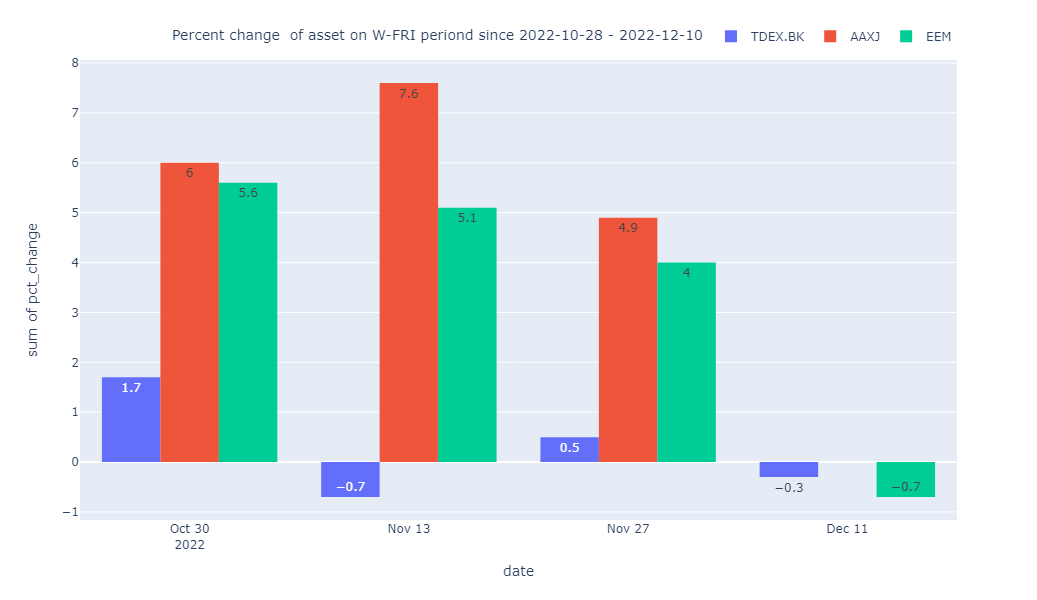

In [51]:
chart_title=f'Percent change  of asset on {timeframe} periond since {from_month_str} - {to_month_str}'
print(chart_title)
fig = px.histogram(df_Pct_Price, x=col_date, y="pct_change",text_auto=True,
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title=chart_title 
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [52]:
chart_title=f"Sum of Return since {from_month_str} to {to_month_str}"


dfSum_Pct_Price=  df_Pct_Price.groupby(["symbol"])[["pct_change"]].sum()
dfSum_Pct_Price.reset_index(drop=False,inplace=True)
dfSum_Pct_Pric=dfSum_Pct_Price.sort_values(by="pct_change",ascending=False)
print(chart_title)
print(dfSum_Pct_Price)


Sum of Return since 2022-10-28 to 2022-12-10
    symbol  pct_change
0     AAXJ        18.5
1      EEM        14.0
2  TDEX.BK         1.2


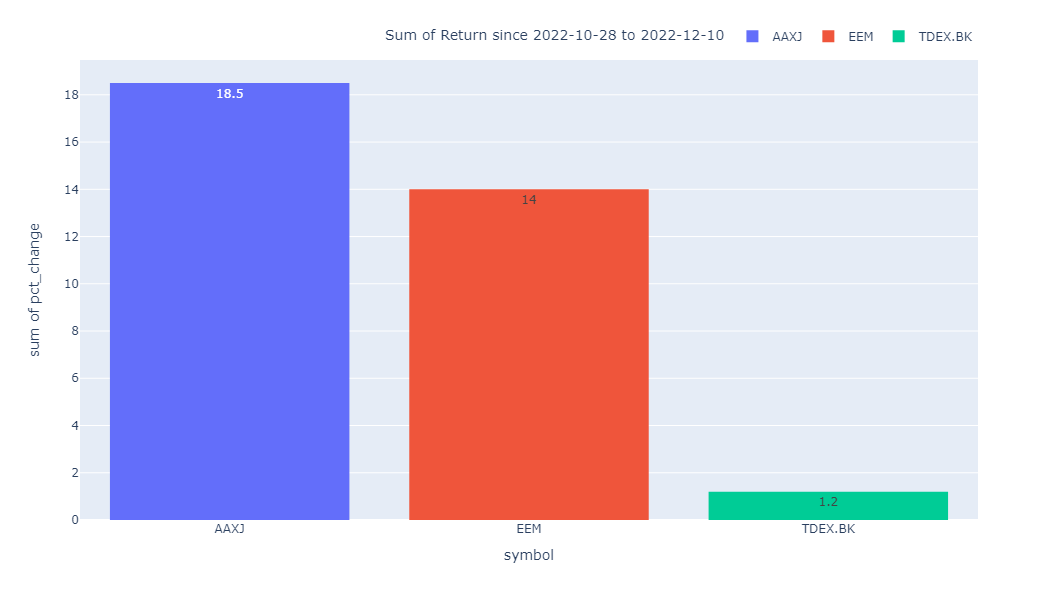

In [53]:

fig = px.histogram(dfSum_Pct_Price, x="symbol", y="pct_change",text_auto=True,
             color='symbol',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title=chart_title 
))

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [54]:
print(f"Count gain or loss at {timeframe} period")
df_Pct_Price['is-gain']=df_Pct_Price.apply(lambda x: 'True' if x['pct_change']>0 else 'False' ,axis=1)
df_Pct_Price

Count gain or loss at W-FRI period


,symbol,date,pct_change,is-gain
0,TDEX.BK,2022-12-09,-0.3,False
1,AAXJ,2022-12-09,-0.0,False
2,EEM,2022-12-09,-0.7,False
3,EEM,2022-12-02,4.7,True
4,TDEX.BK,2022-12-02,0.8,True
5,AAXJ,2022-12-02,5.9,True
6,TDEX.BK,2022-11-25,-0.3,False
7,EEM,2022-11-25,-0.7,False
8,AAXJ,2022-11-25,-1.0,False
9,EEM,2022-11-18,-0.3,False


In [55]:
df_PCt_Count=df_Pct_Price.groupby([col_date,'is-gain'],as_index=False).size()
df_PCt_Count.rename(columns={'size':'count'},inplace=True)
df_PCt_Count=df_PCt_Count.reset_index(drop=True)
df_PCt_Count

,date,is-gain,count
0,2022-11-04,True,3
1,2022-11-11,True,3
2,2022-11-18,False,2
3,2022-11-18,True,1
4,2022-11-25,False,3
5,2022-12-02,True,3
6,2022-12-09,False,3


In [56]:
writer=pd.ExcelWriter(f'{report_path}\\Summary.xlsx',engine='xlsxwriter') 

df_Pct_Price.to_excel(writer, sheet_name="PctSymbol_Date",index=False)
df_PCt_Count.to_excel(writer, sheet_name="IsGain_Date",index=False)
writer.save()

print("Successfully")

Successfully


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_16732\935811667.py:5: FutureWarning:

save is not part of the public API, usage can give in unexpected results and will be removed in a future version

